In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [6]:
data = pd.read_csv('Advertising.csv')    # TV、Radio、Newspaper、Sales
x = data[['TV', 'Radio', 'Newspaper']]
# x = data[['TV', 'Radio']]
y = data['Sales']
# print(x)
# print(y)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.8)
# model = Lasso()
model = Ridge()
alpha_can = np.logspace(-3, 2, 10) # 创建等比数列，从10^-3 到 10^2
np.set_printoptions(suppress=True)
print('alpha_can = ', alpha_can)
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)
lasso_model.fit(x_train, y_train)
print('超参数：\n', lasso_model.best_params_)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


alpha_can =  [   0.001         0.00359381    0.0129155     0.04641589    0.16681005
    0.59948425    2.15443469    7.74263683   27.82559402  100.        ]
超参数：
 {'alpha': 7.7426368268112773}


In [9]:
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order, :]
y_hat = lasso_model.predict(x_test)
print(lasso_model.score(x_test, y_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(mse, rmse)

0.892714279041
1.99274576769 1.41164647405


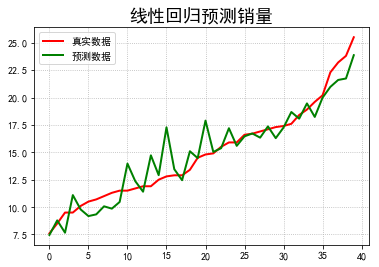

In [10]:
t = np.arange(len(x_test))
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r-', linewidth=2, label='真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label='预测数据')
plt.title('线性回归预测销量', fontsize=18)
plt.legend(loc='upper left')
plt.grid(b=True, ls=':')
plt.show()